In [2]:
# Imoporting all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading dataset h5 using Pandas

df = pd.read_hdf('df_individual_analyzed_merged.h5', key='dataframe')

In [5]:
df

val
cond                                  mouse   day   within_factor target            signal_type task_type trial time                      rel_time                 
cond_B6-lodger-10min-habituation      AM22043 day11 wICR          roi_target        Continuous            0     2022-09-28 06:47:00+09:00 0 days 00:00:00  0.000000
                                                                  event_roi_target  Continuous            0     2022-09-28 06:47:00+09:00 0 days 00:00:00  0.000000
                                                                  roi_control       Continuous            0     2022-09-28 06:47:00+09:00 0 days 00:00:00  0.000000
                                                                  event_roi_control Continuous            0     2022-09-28 06:47:00+09:00 0 days 00:00:00  0.000000
                                                                  roi_target        Continuous            0     2022-09-28 06:47:01+09:00 0 days 00:00:01  0.000000
...                                                                                                                                                             ...
cond_single-housing-10min-habituation AM22062 day0  woICR         event_roi_control Continuous            0     2022-11-28 07:53:11+09:00 0 days 00:02:59  0.049988
                                                                  roi_target        Continuous            0     2022-11-28 07:53:12+09:00 0 days 00:03:00  0.000000
                                                                  event_roi_target  Continuous            0     2022-11-28 07:53:12+09:00 0 days 00:03:00  0.000000
                                                                  roi_control       Continuous            0     2022-11-28 07:53:12+09:00 0 days 00:03:00  1.000000
                                                                  event_roi_control Continuous            0     2022-11-28 07:53:12+09:00 0 days 00:03:00  0.000000

[98486 rows x 1 columns]

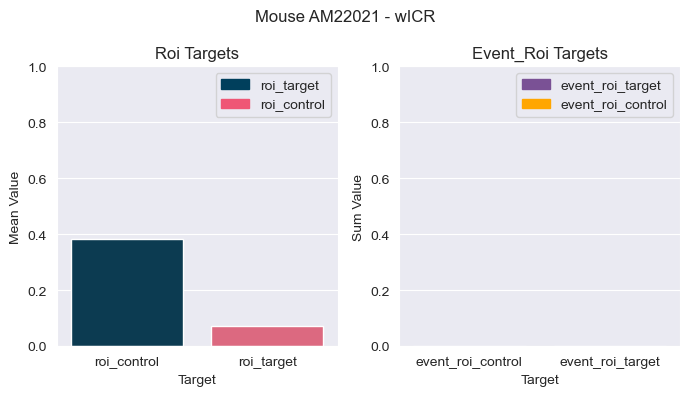

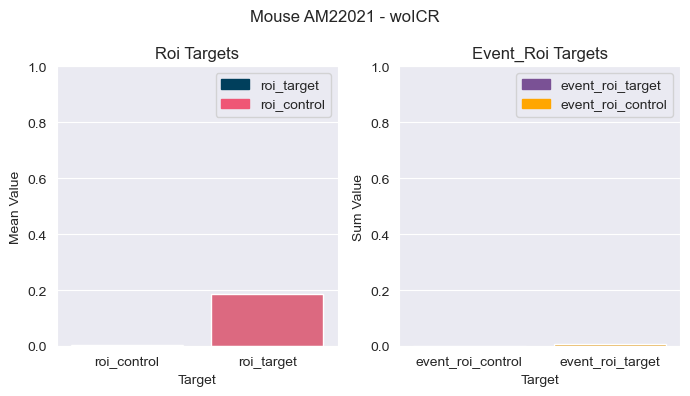

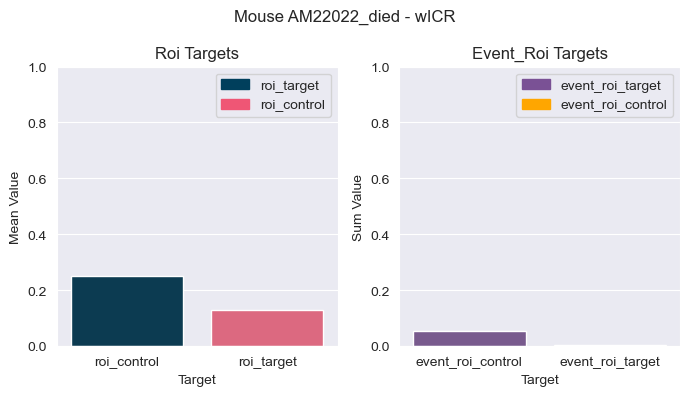

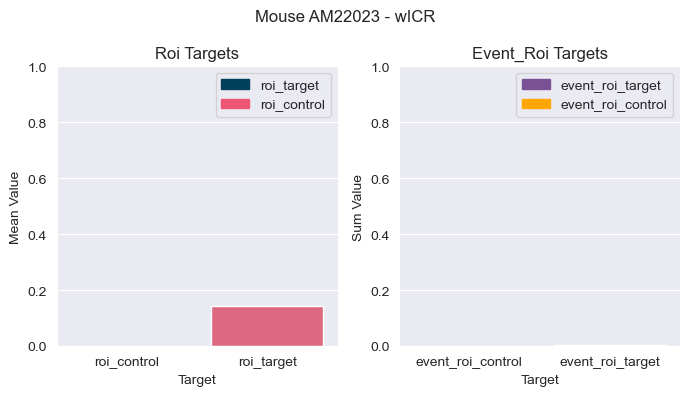

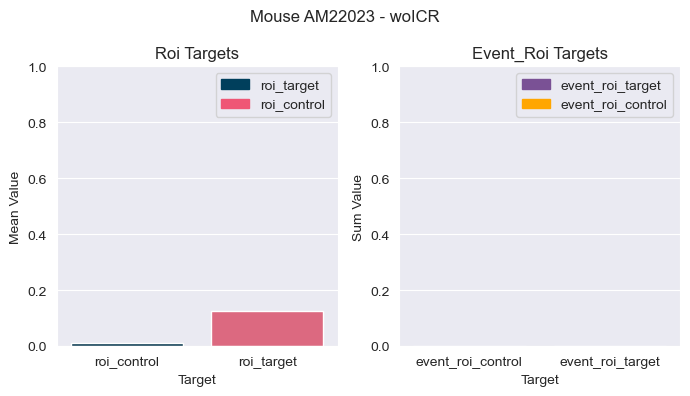

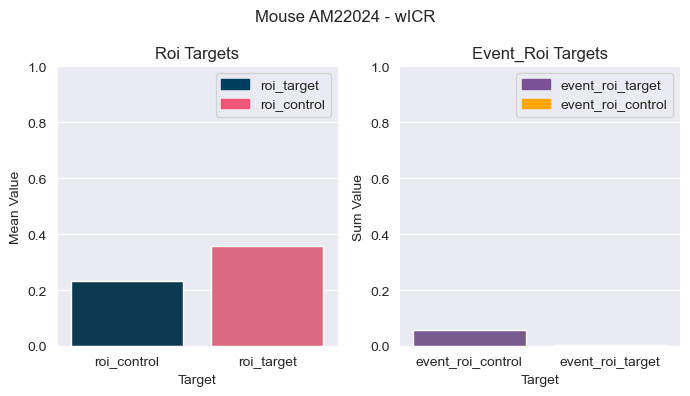

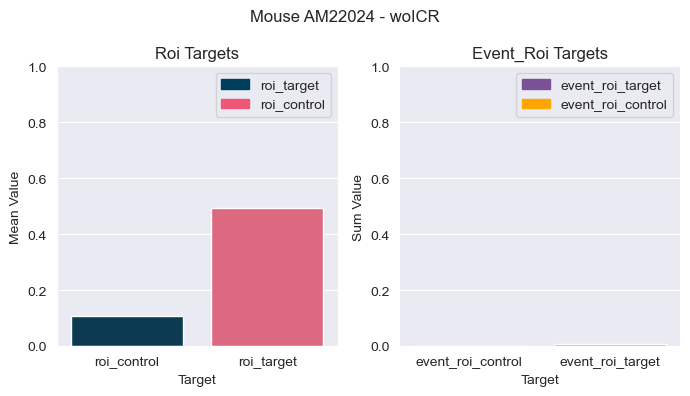

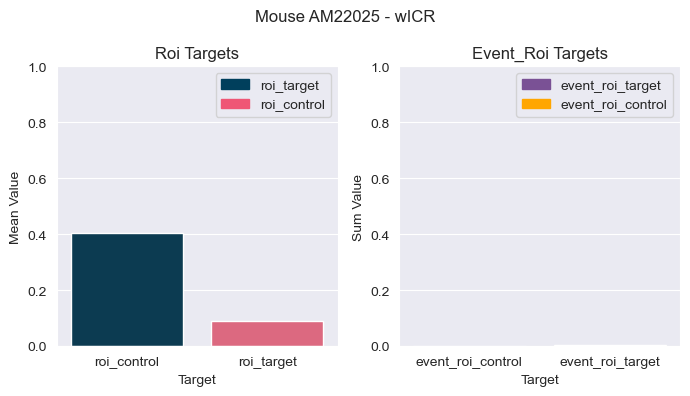

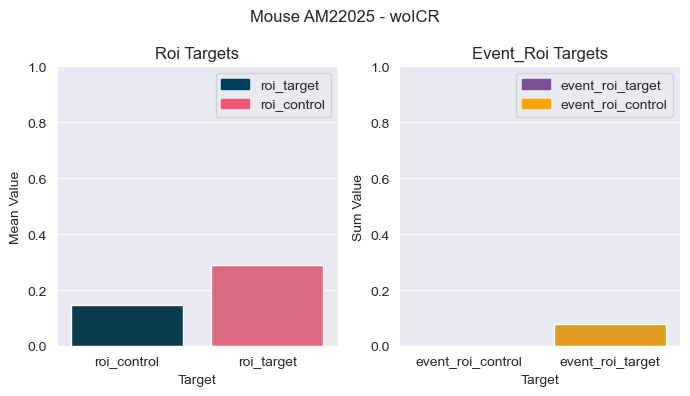

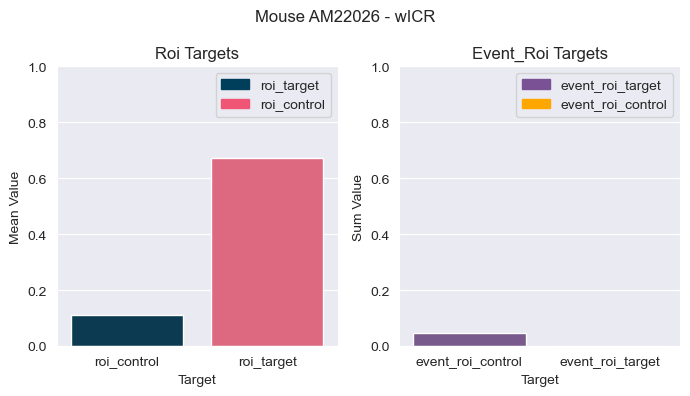

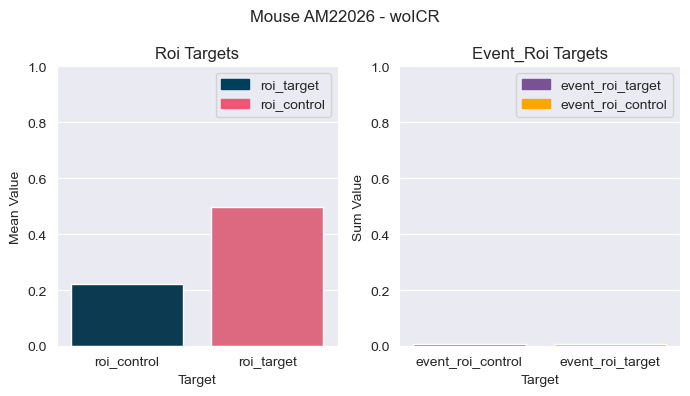

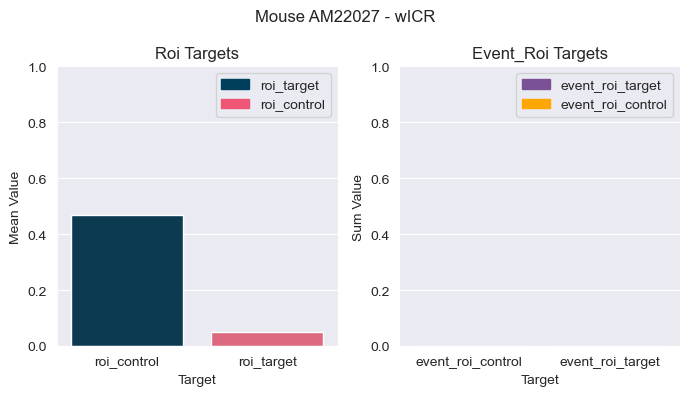

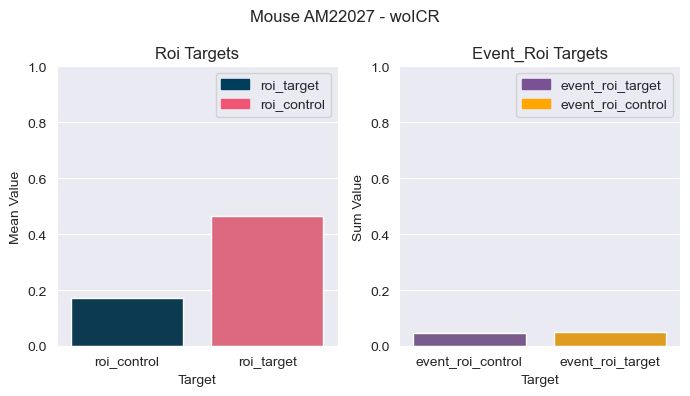

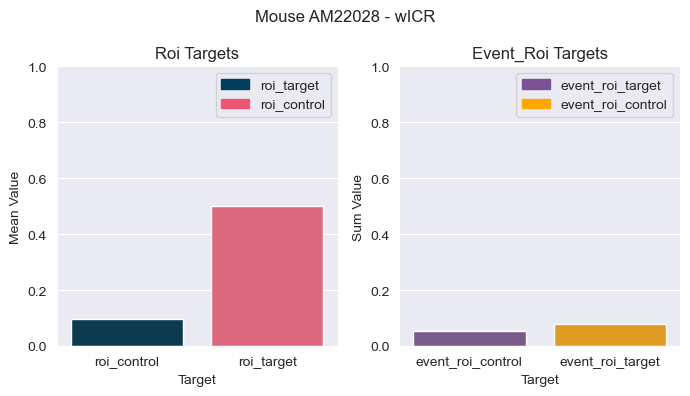

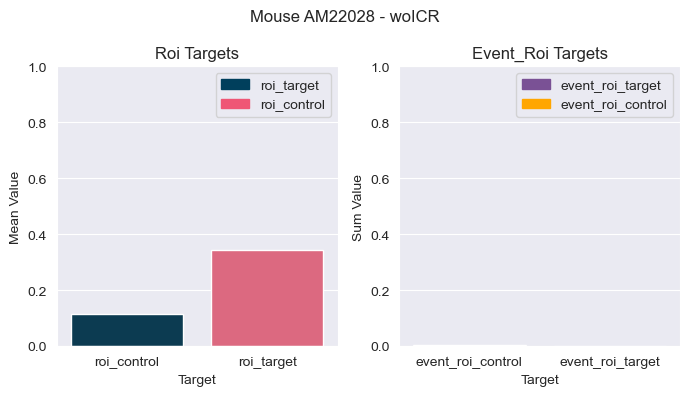

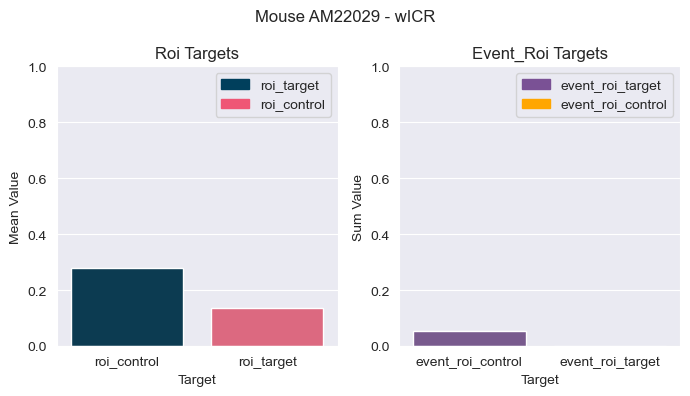

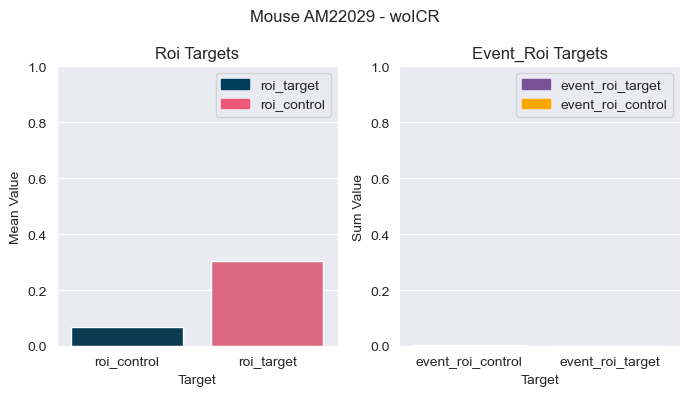

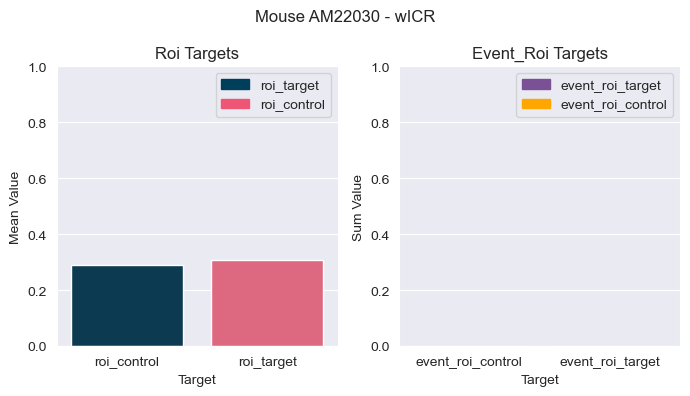

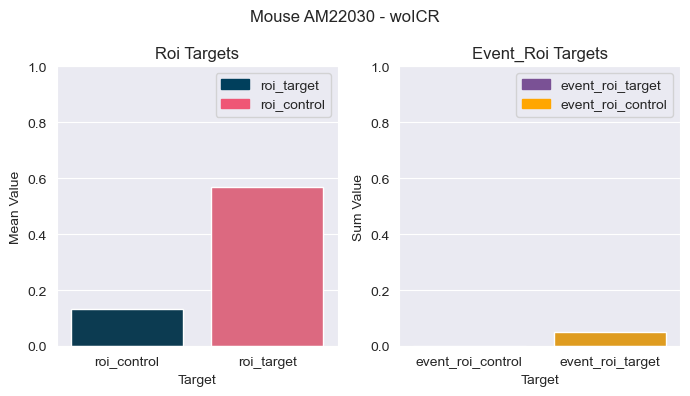

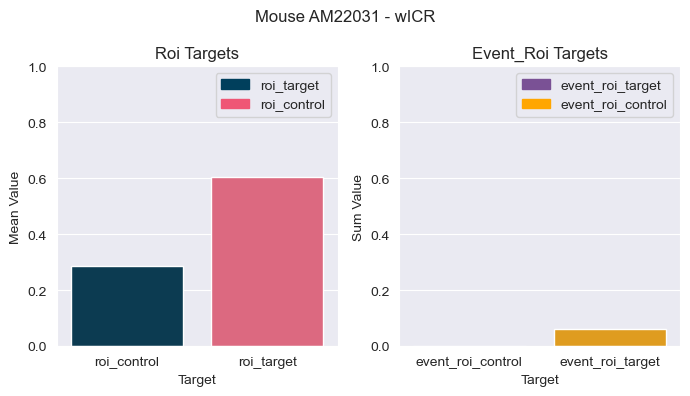

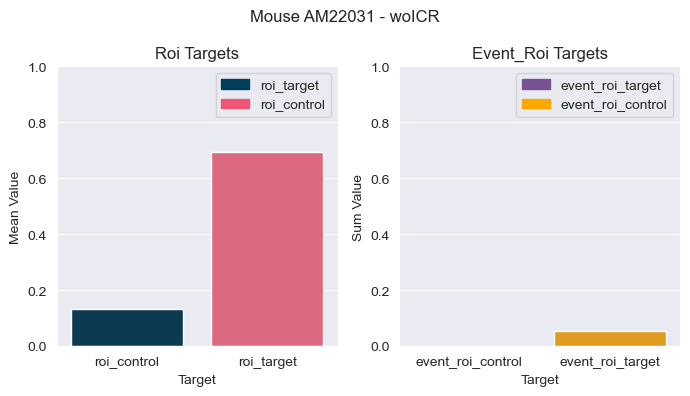

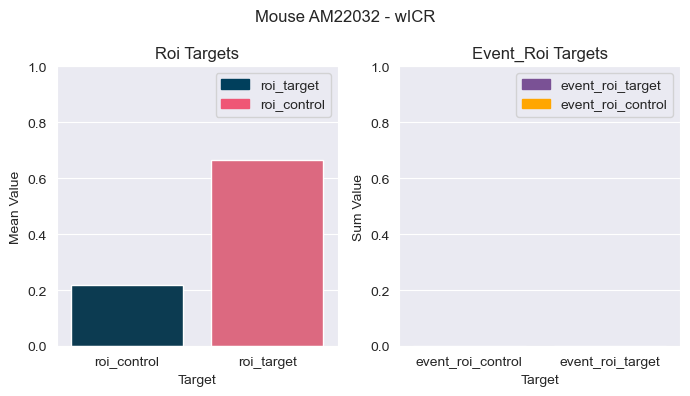

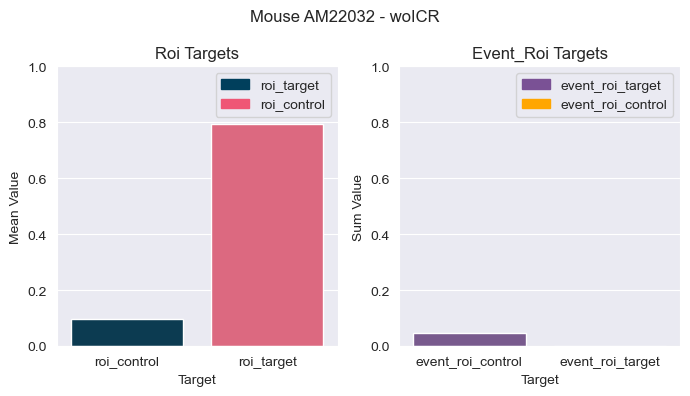

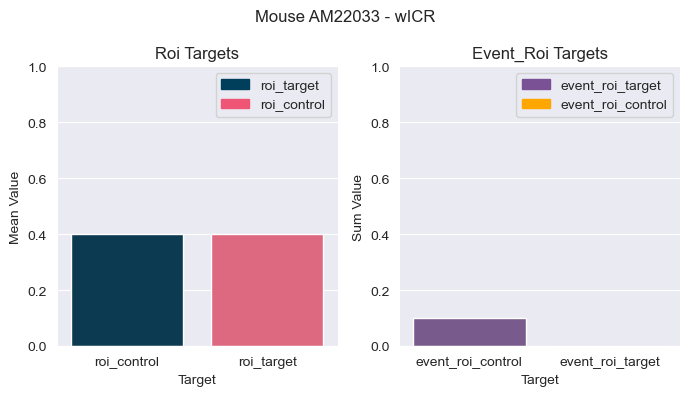

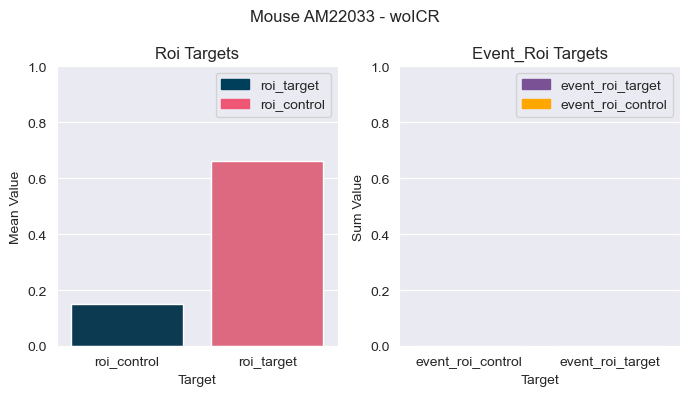

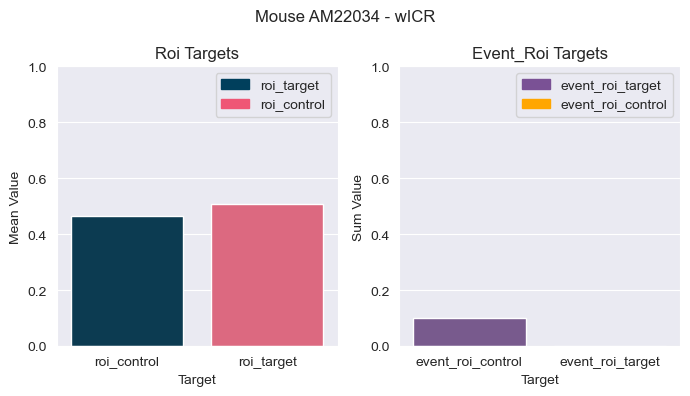

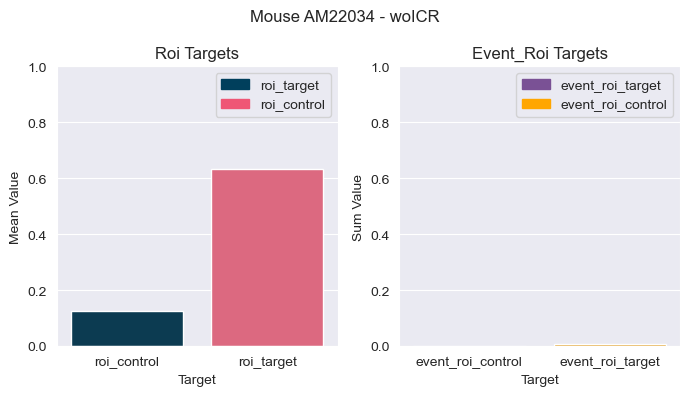

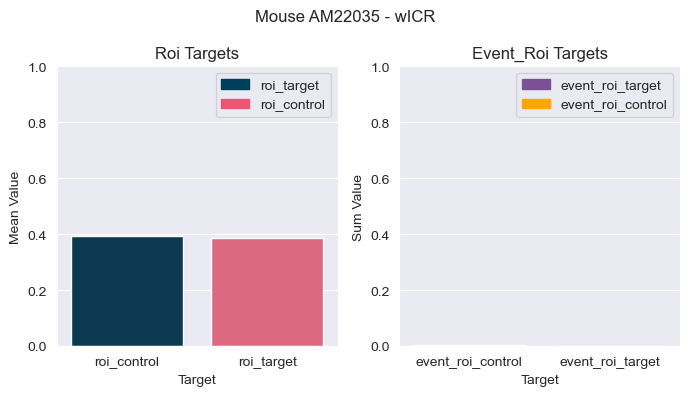

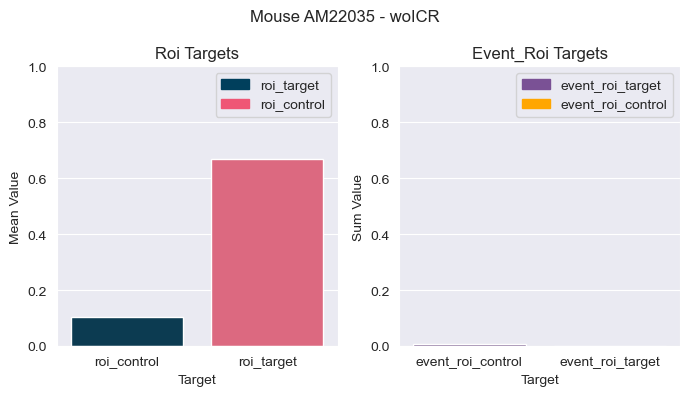

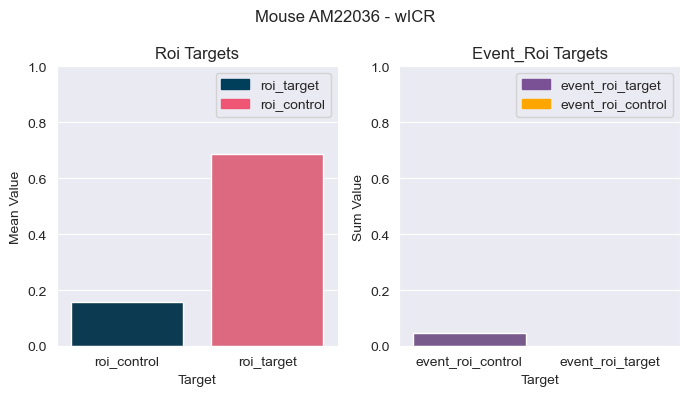

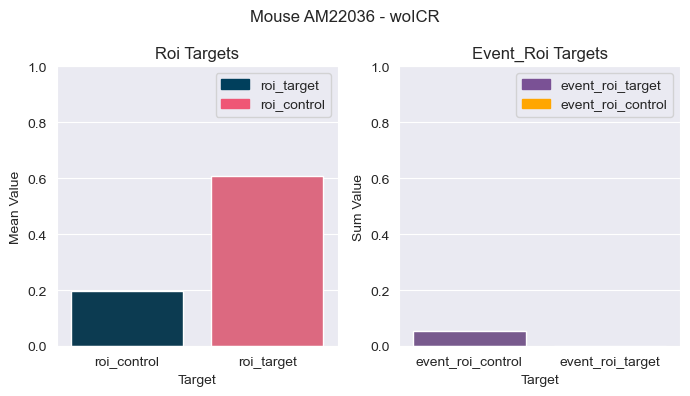

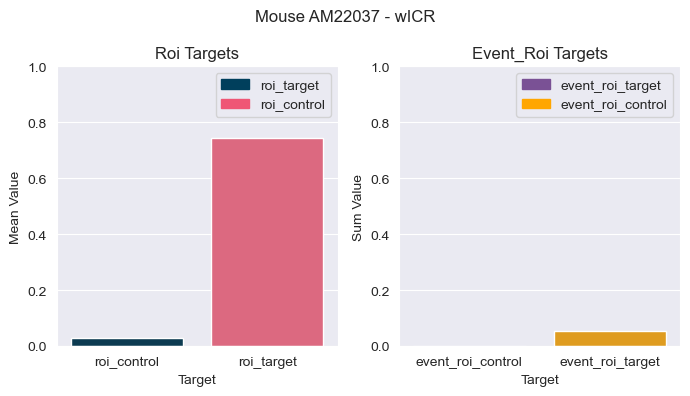

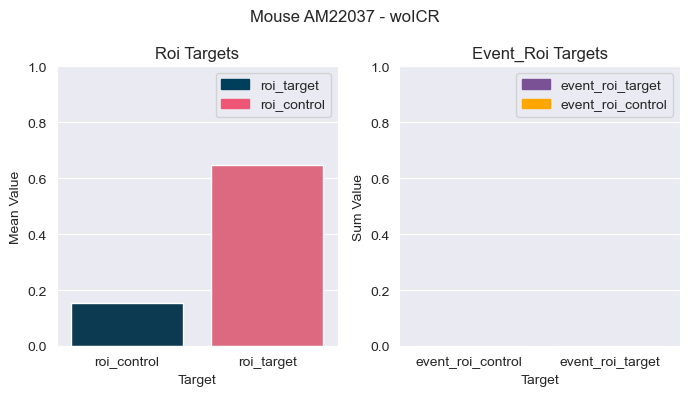

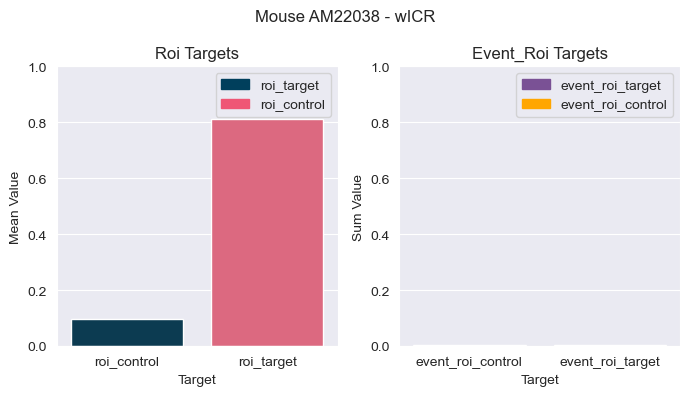

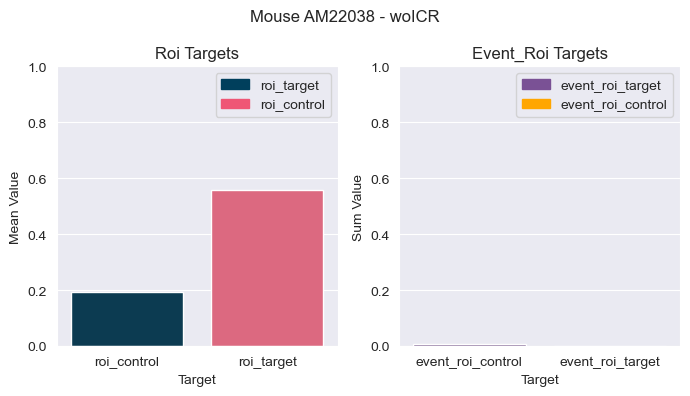

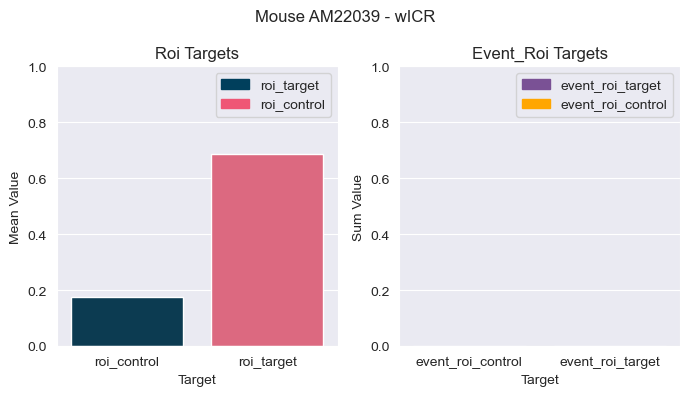

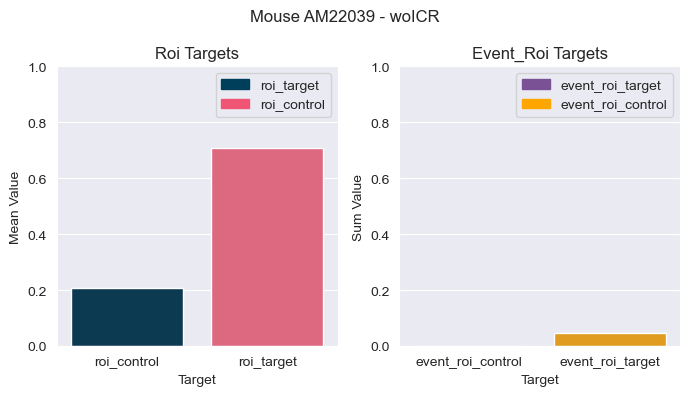

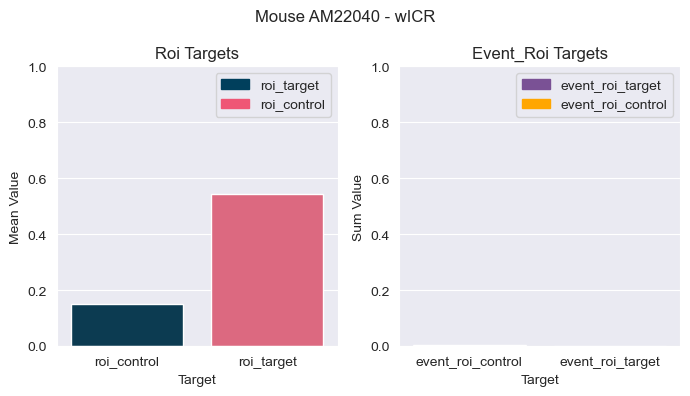

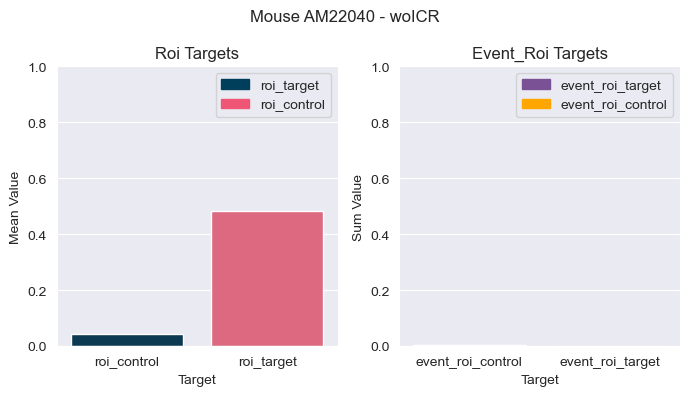

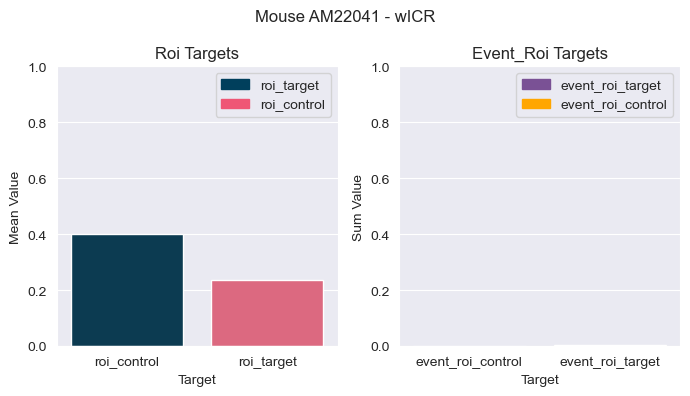

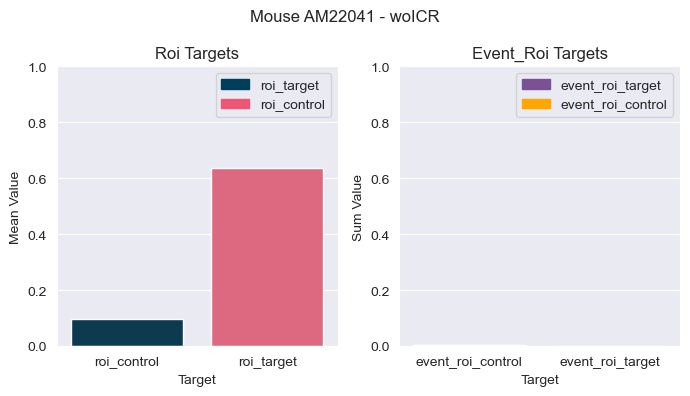

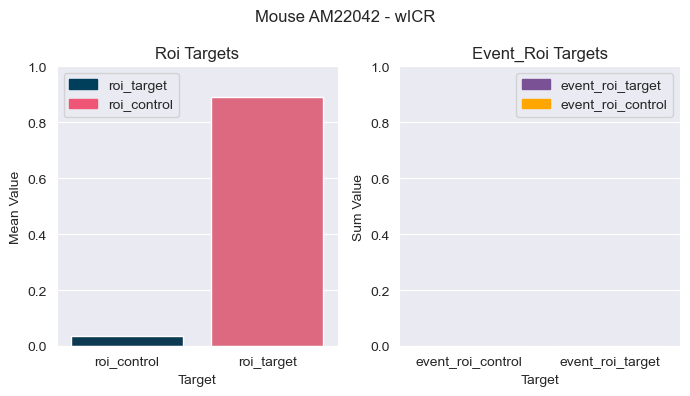

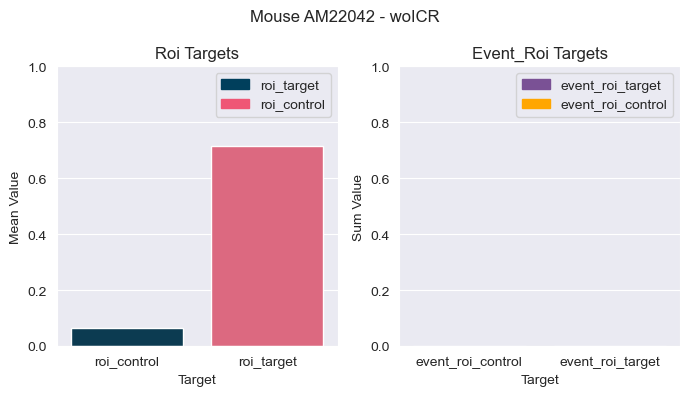

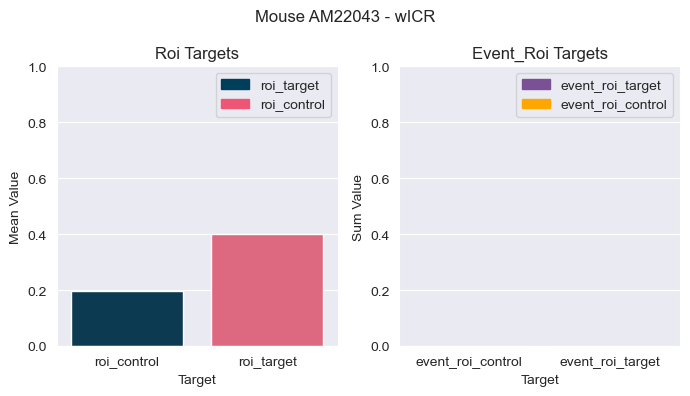

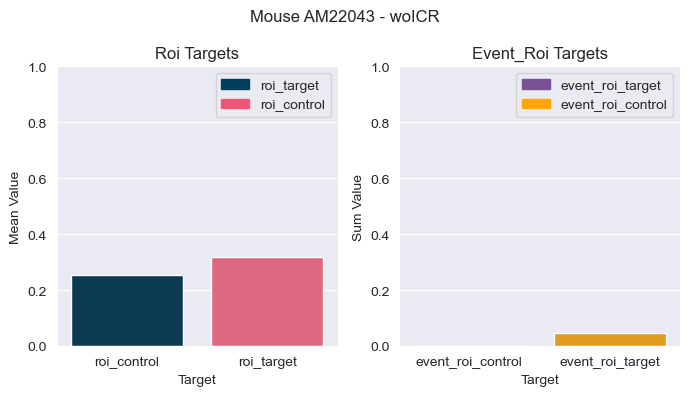

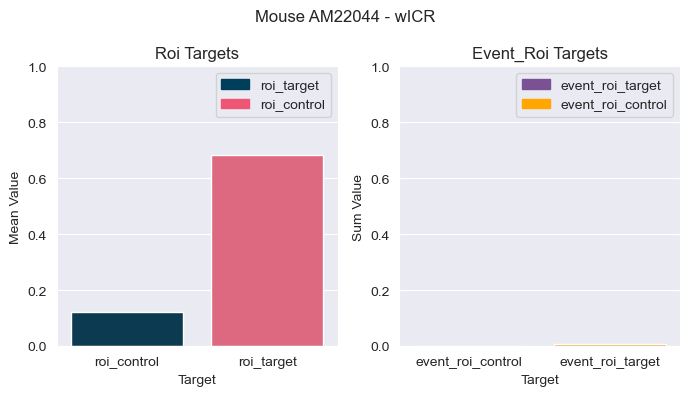

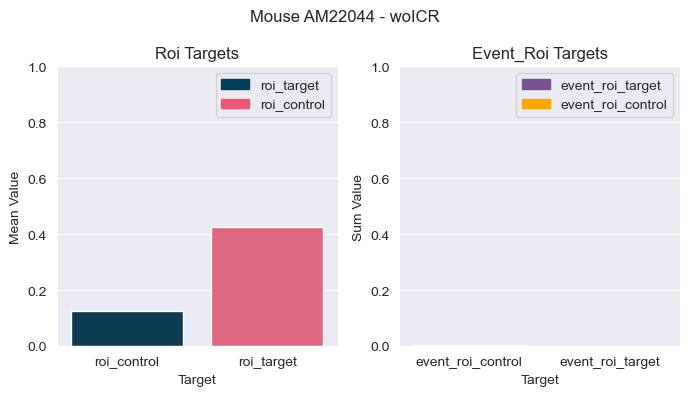

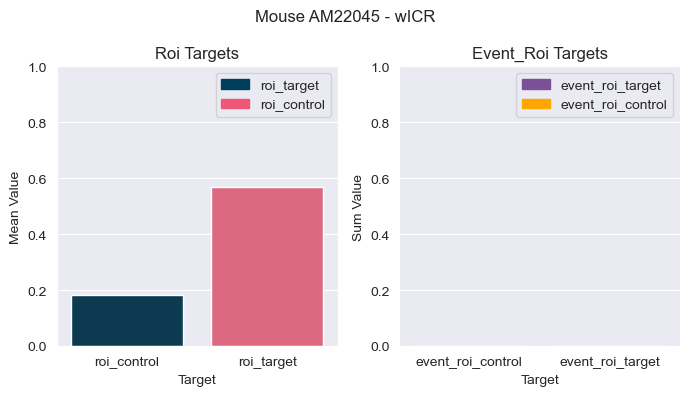

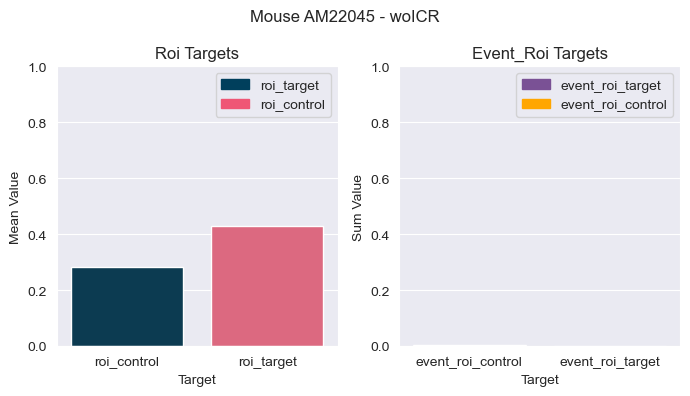

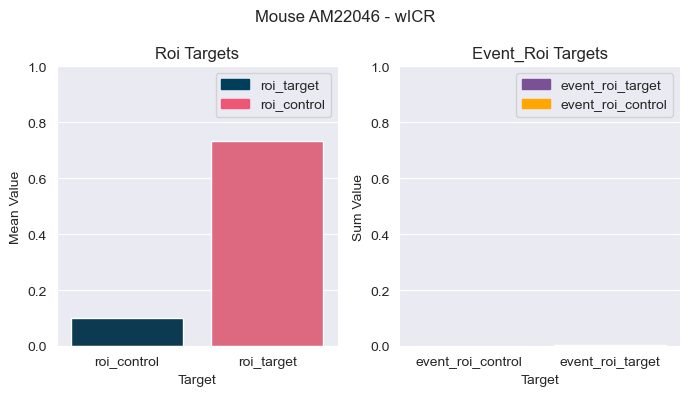

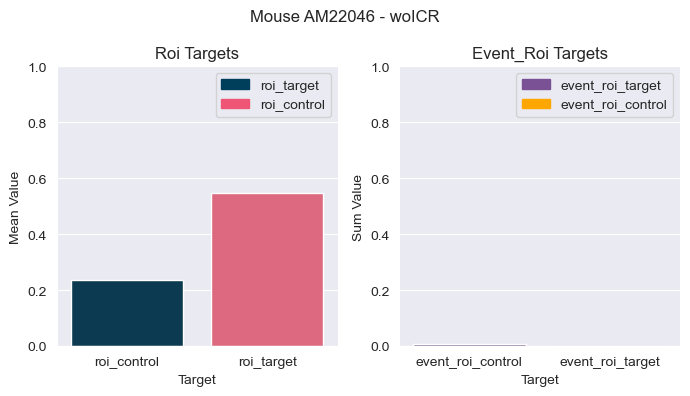

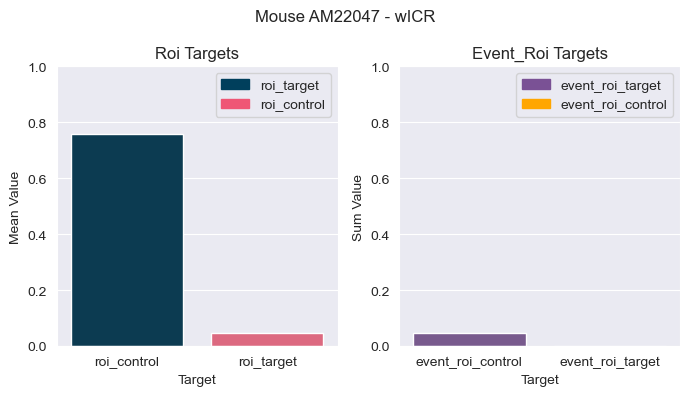

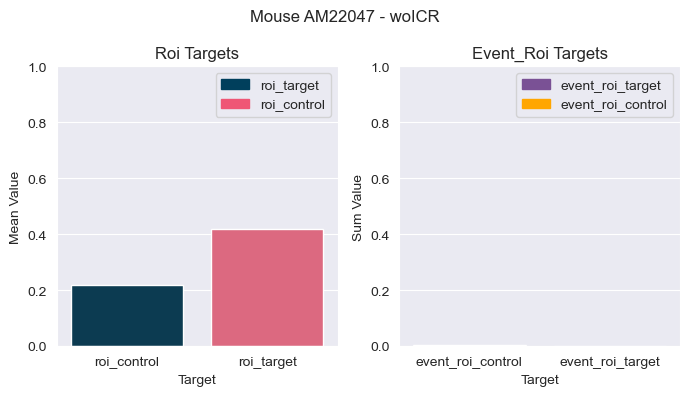

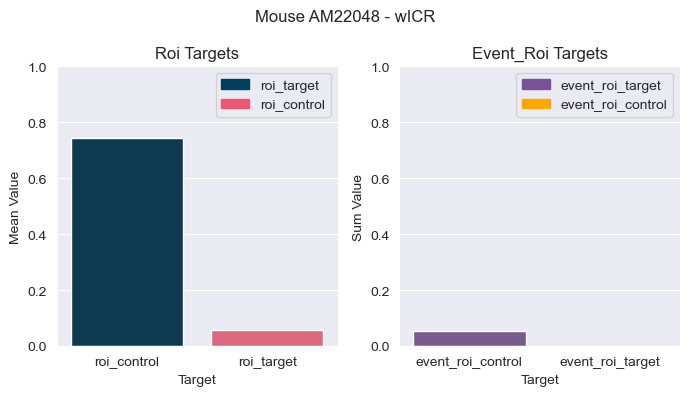

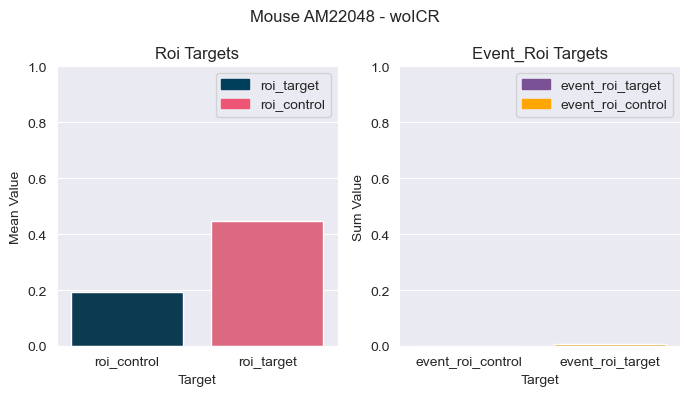

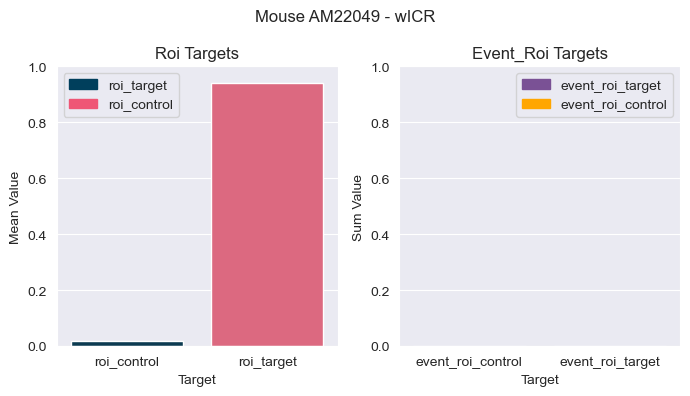

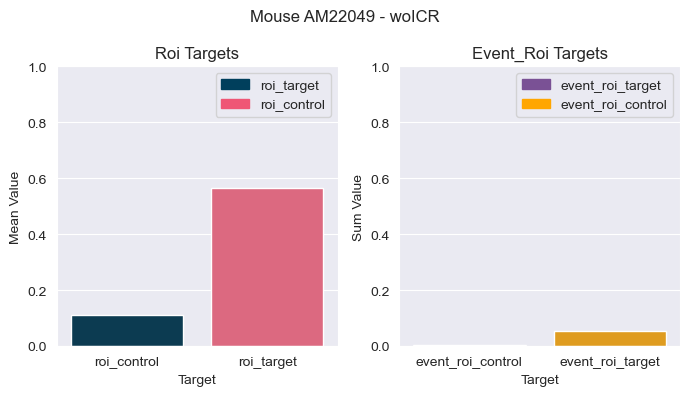

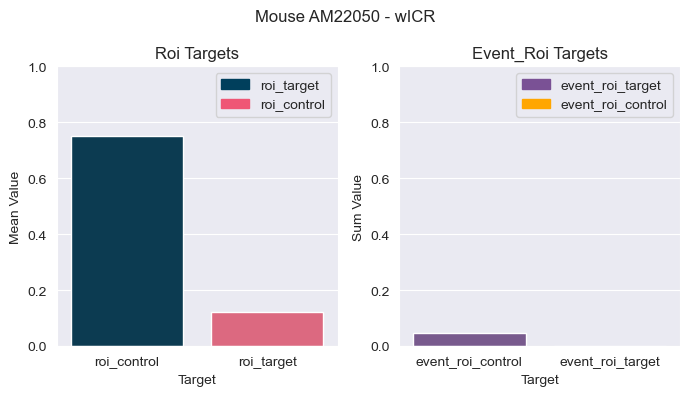

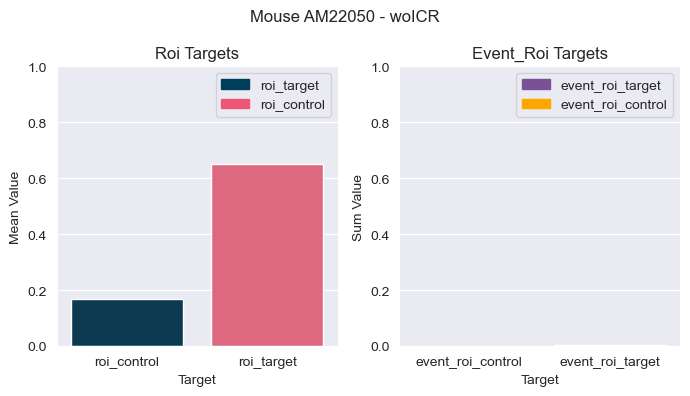

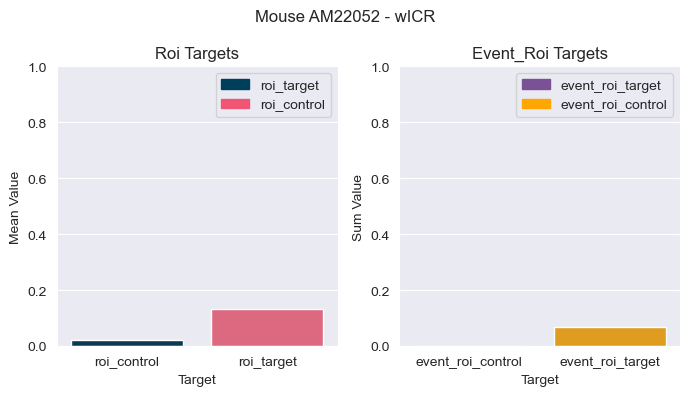

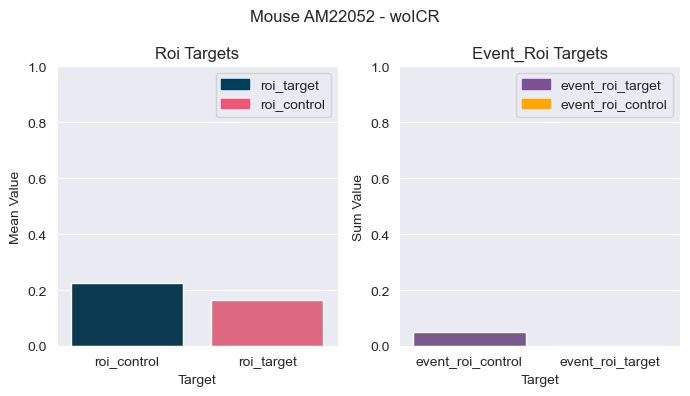

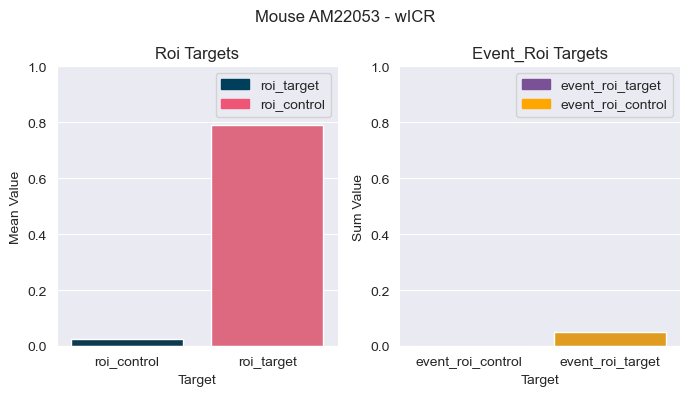

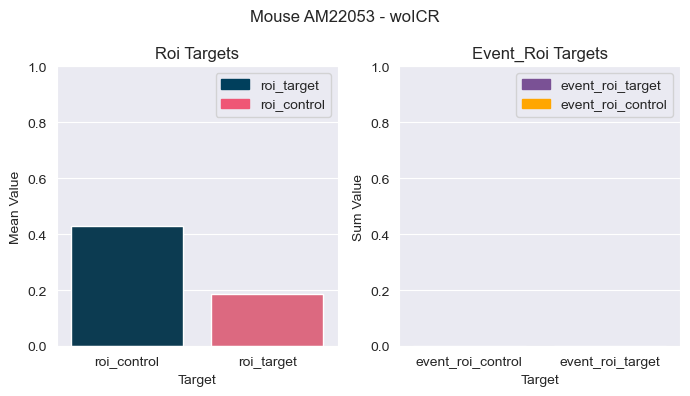

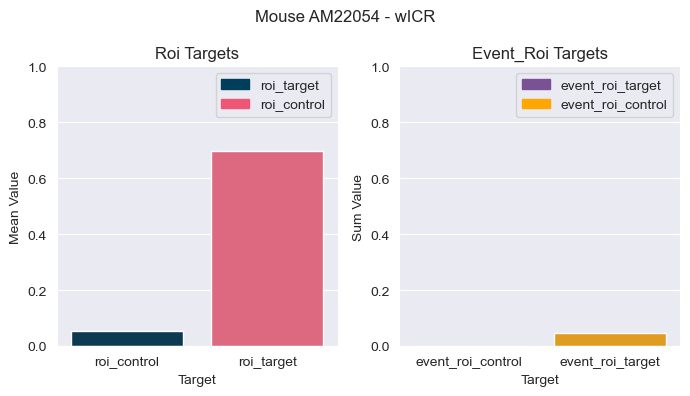

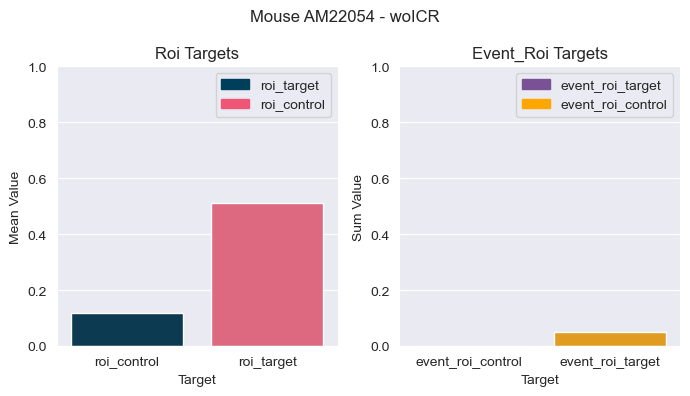

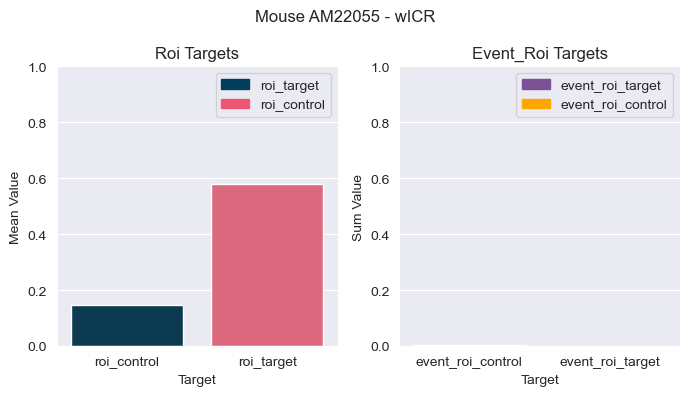

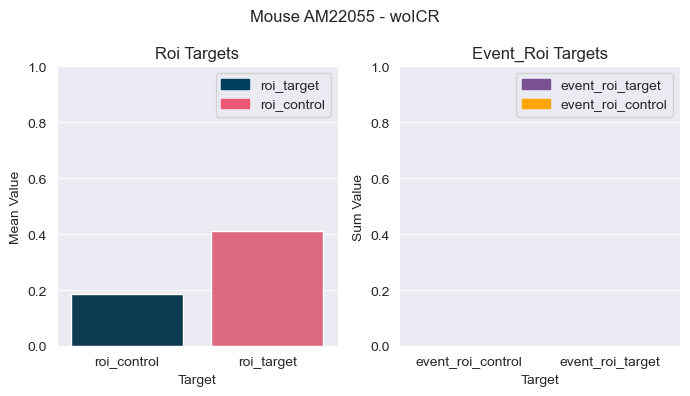

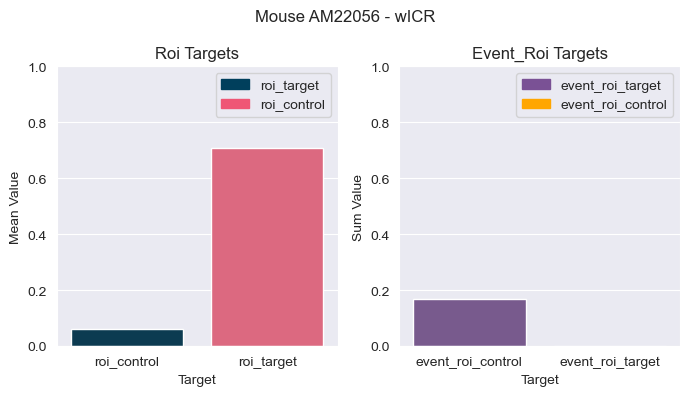

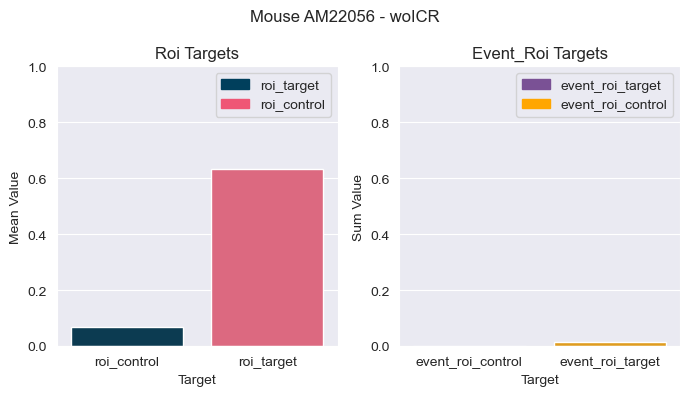

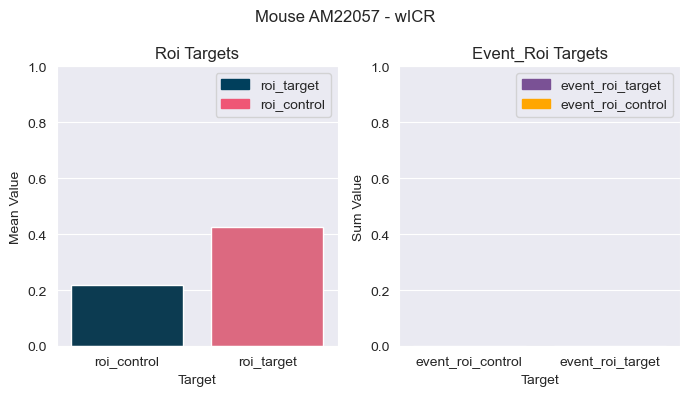

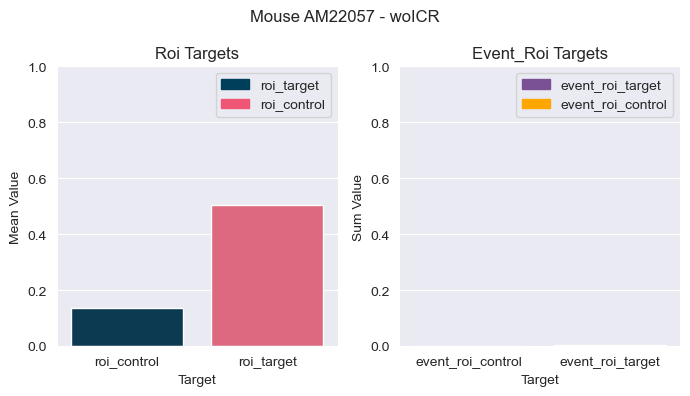

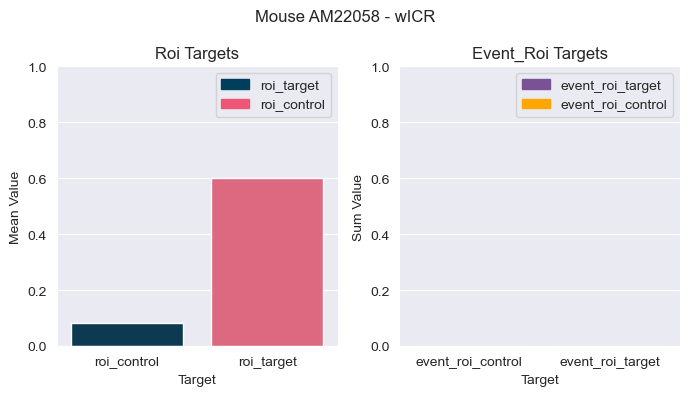

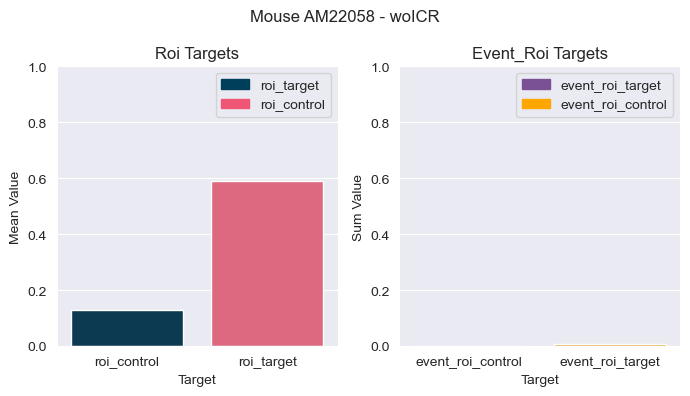

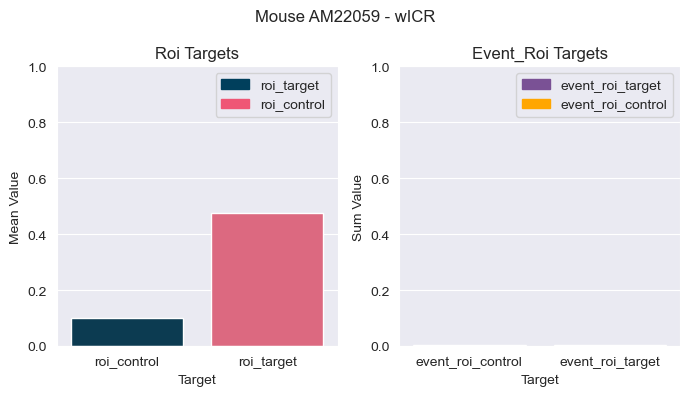

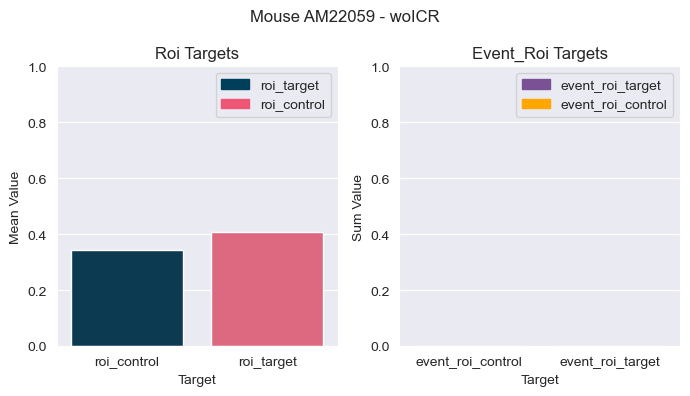

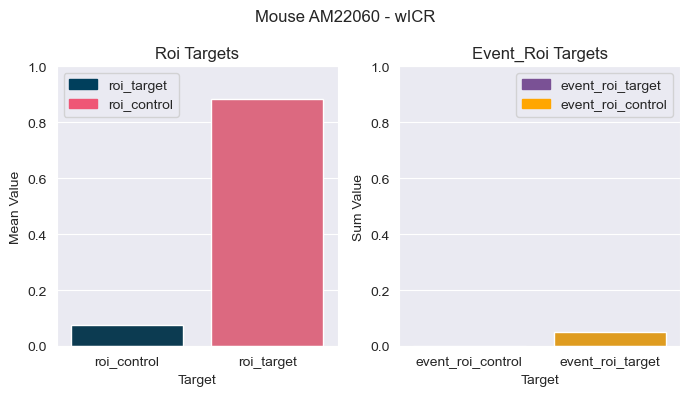

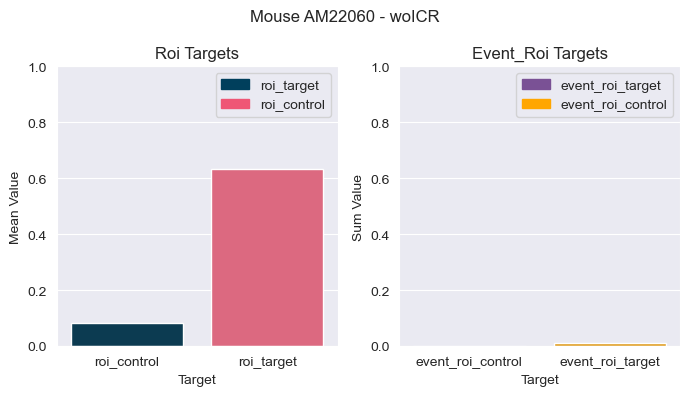

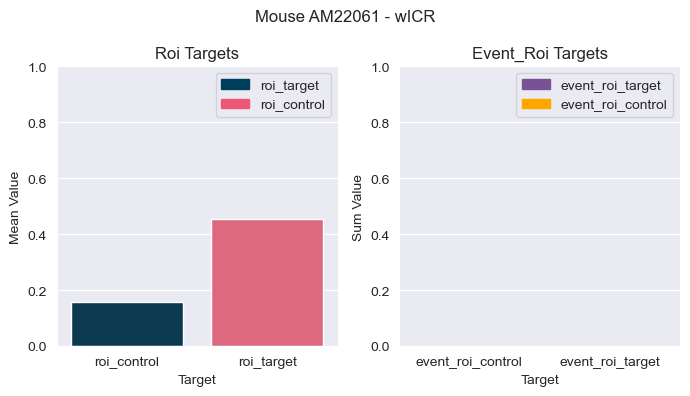

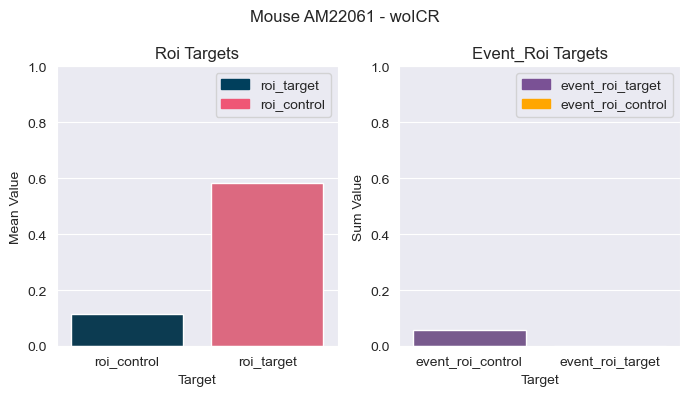

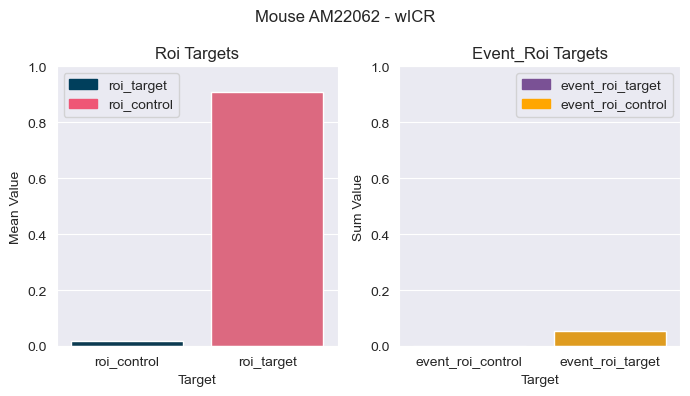

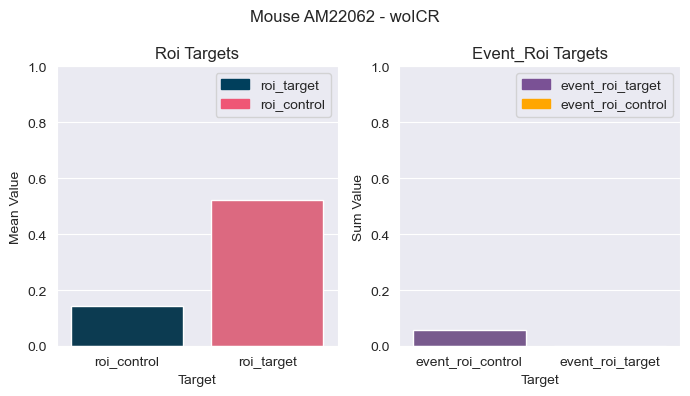

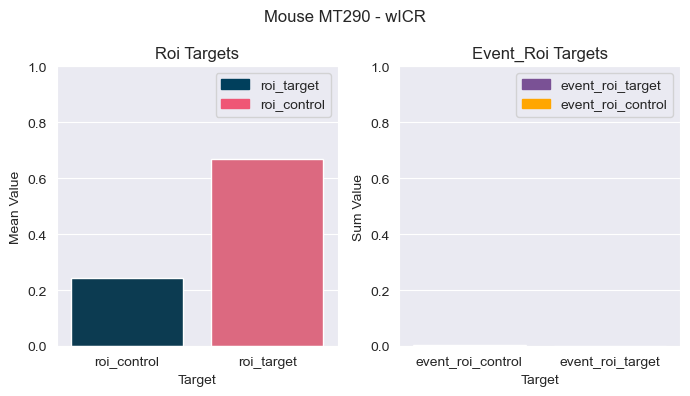

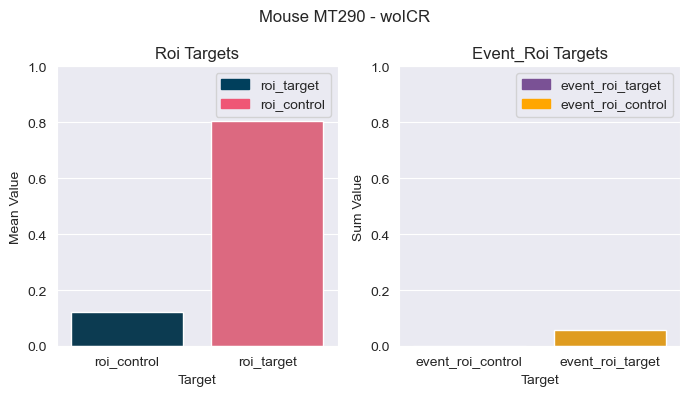

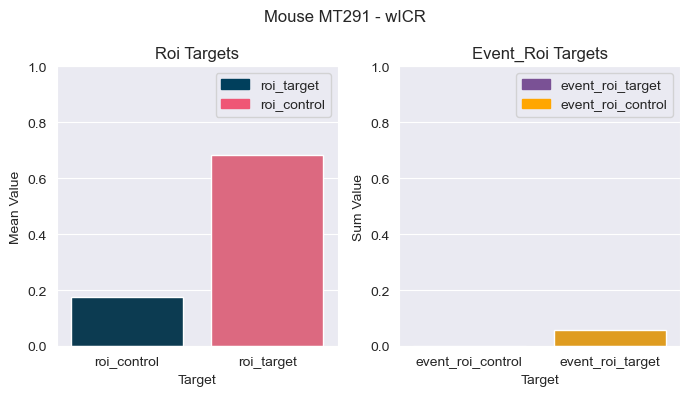

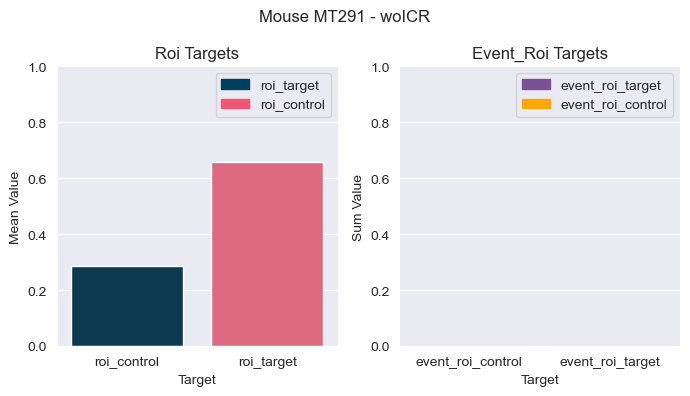

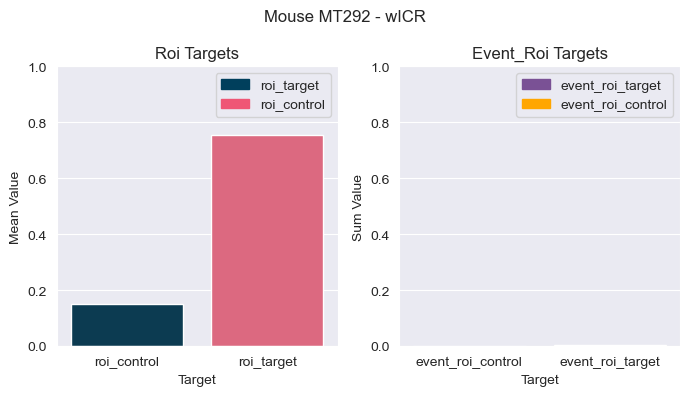

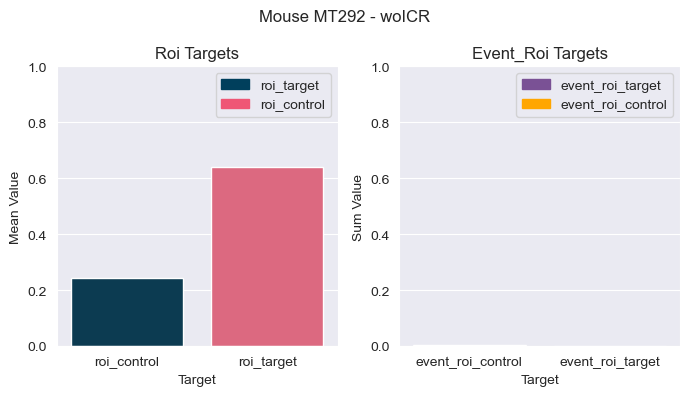

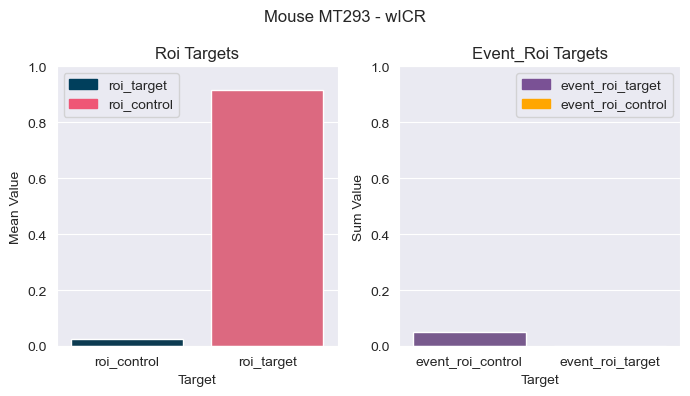

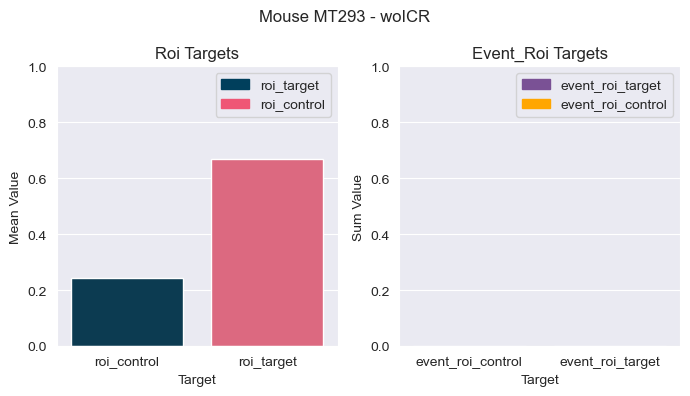

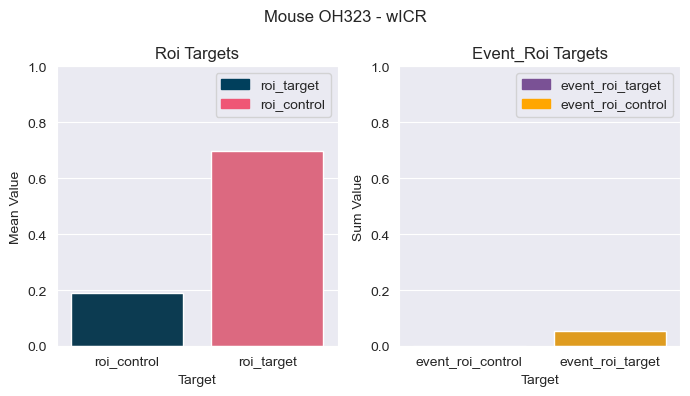

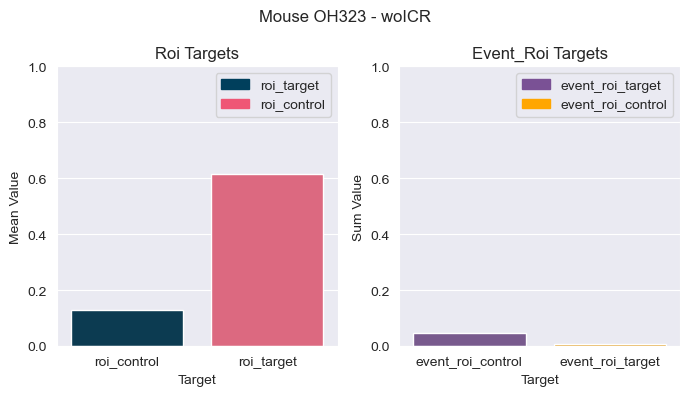

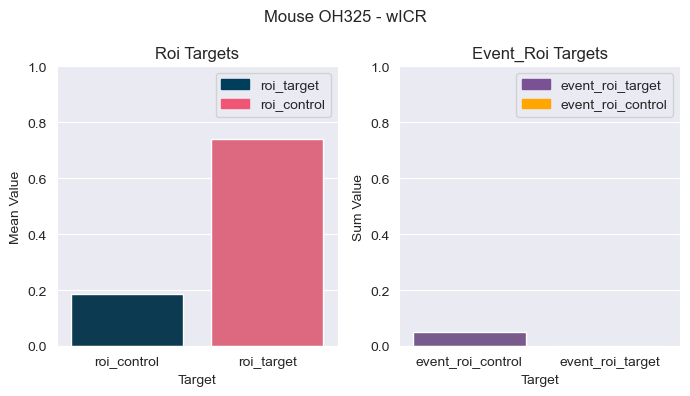

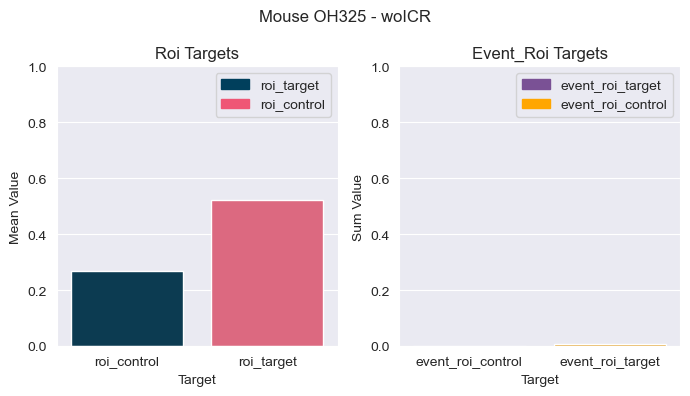

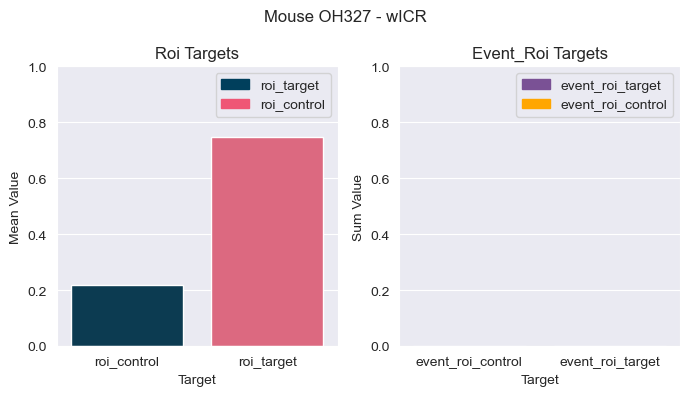

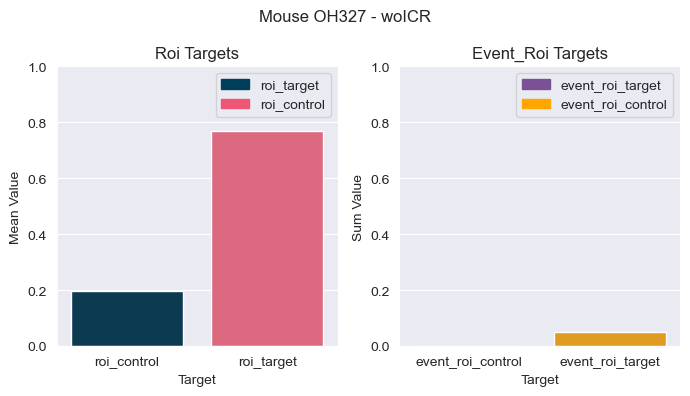

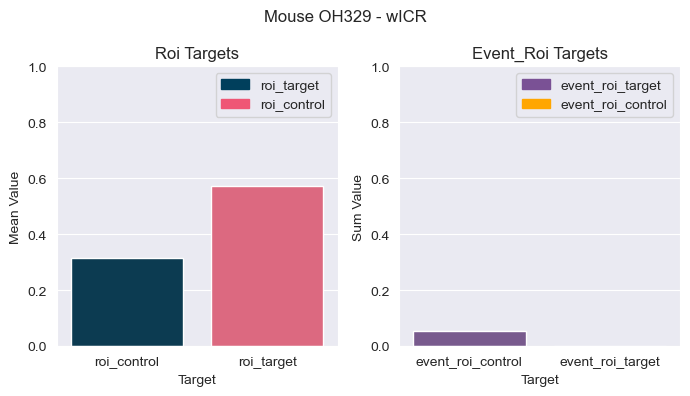

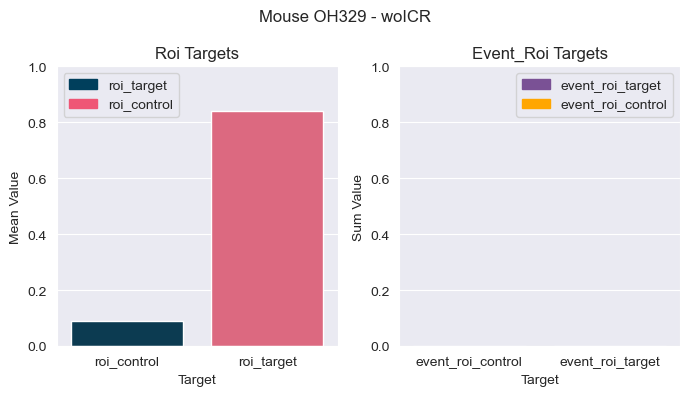

In [4]:
sns.set_style('darkgrid')

# Define colors for different target types
colors = {'roi_target': '#003f5c', 'event_roi_target': '#7a5195', 'roi_control': '#ef5675', 'event_roi_control': '#ffa600'}

# Loop over each unique mouse and within_factor combination
for (mouse, within_factor), data in df.groupby(['mouse', 'within_factor']):
    # Create a figure object with 2 subplots
    fig, axs = plt.subplots(ncols=2, figsize=(7, 4))

    # Select the data for each target type
    target_data = data.loc[data.index.get_level_values('target').isin(['roi_target', 'roi_control'])].groupby('target').mean()
    event_data = data.loc[data.index.get_level_values('target').isin(['event_roi_target', 'event_roi_control'])].groupby('target').sum()

    # Create bar plots for each target type in the appropriate subplot
    for i, (plot_data, target_type) in enumerate([(target_data, 'roi'), (event_data, 'event_roi')]):
        if target_type == 'roi':
            ylabel = 'Mean Value'
        else:
            ylabel = 'Sum Value'
        sns.barplot(x=plot_data.index, y=plot_data.values.ravel(), palette=[colors[f'{target_type}_target'], colors[f'{target_type}_control']], ax=axs[i])
        axs[i].set(xlabel='Target', ylabel=ylabel, title=f'{target_type.title()} Targets')
        axs[i].set_ylim([0, 1])
        handles = [plt.Rectangle((0,0),1,1, color=color) for color in [colors[f'{target_type}_target'], colors[f'{target_type}_control']]]
        labels = [f'{target_type}_target', f'{target_type}_control']
        axs[i].legend(handles, labels)
    # Set the title of the figure
    fig.suptitle(f'Mouse {mouse} - {within_factor}')
    # Adjust the layout and spacing of subplots
    fig.tight_layout()
    # Display the plot
    plt.show()